# Exp 46-52 analysis

Several tests of the replicator opt method, comparing `num_replicators` to `num_iterations` (the number of replication events).

See `./informercial/Makefile` for full experimental details.

In [2]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import meta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint

import gym

In [3]:
# ls ../data/exp2*

# Load and process data

In [7]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_names = ["exp46", "exp47", "exp48", 
             "exp49", "exp50", "exp51", 
             "exp52"]
num_iterations = [16, 2, 4, 
                  8, 16, 8, 
                 4]
num_replicators = [40, 400, 400,
                  400, 400, 40,
                  40]

best_params = []
ties = []
total_Rs = []
lrs = []
for exp_name, i, r in zip(exp_names, num_iterations, num_replicators):
    best = load_checkpoint(os.path.join(data_path, f"{exp_name}_best.pkl"))
    
    best_params.append(best)
    ties.append(best["tie_threshold"])
    lrs.append(best["lr"])
    total_Rs.append(best["total_R"])

In [11]:
total_Rs, ties, lrs

([79.0, 43.0, 83.0, 87.0, 82.0, 81.0, 88.0],
 [0.05170622381361763,
  0.03445070293423822,
  0.005942132325156814,
  0.019177048327543612,
  0.014241769966555226,
  0.060695323146614424,
  0.1431450391147704],
 [0.07915672290595326,
  0.0039834751368258295,
  0.09388342781723866,
  0.020275991906962502,
  0.03560542194092265,
  0.09612752908293383,
  0.1421784912409777])

# Performance

of best parameters

In [13]:
env_name = 'BanditOneHigh10-v0'
num_episodes = 10*10

results = []
for best in best_params:
    # Run w/ best params
    result = meta_bandit(
        env_name=env_name,
        num_episodes=num_episodes, 
        lr=best["lr"], 
        tie_threshold=best["tie_threshold"],
        seed_value=129
    )
    results.append(result)

In [15]:
results[0]

{'best': 7,
 'episodes': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'policies': [1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7
Best arm: 7, last arm: 7


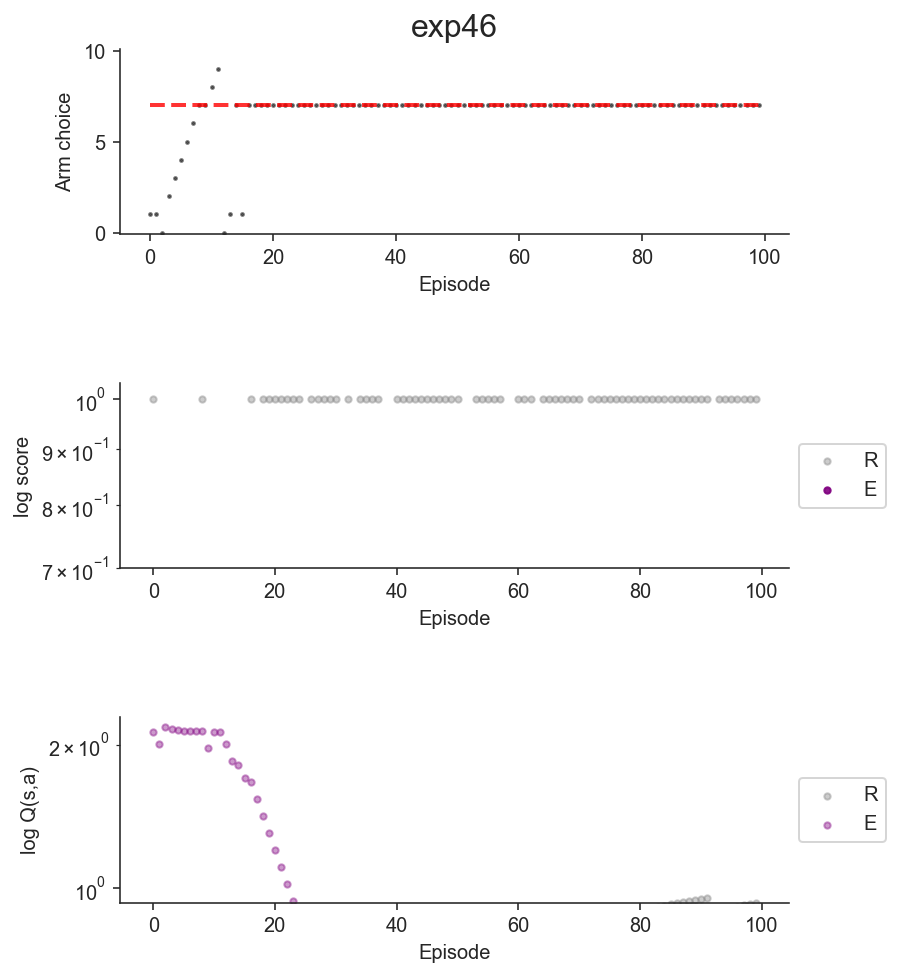

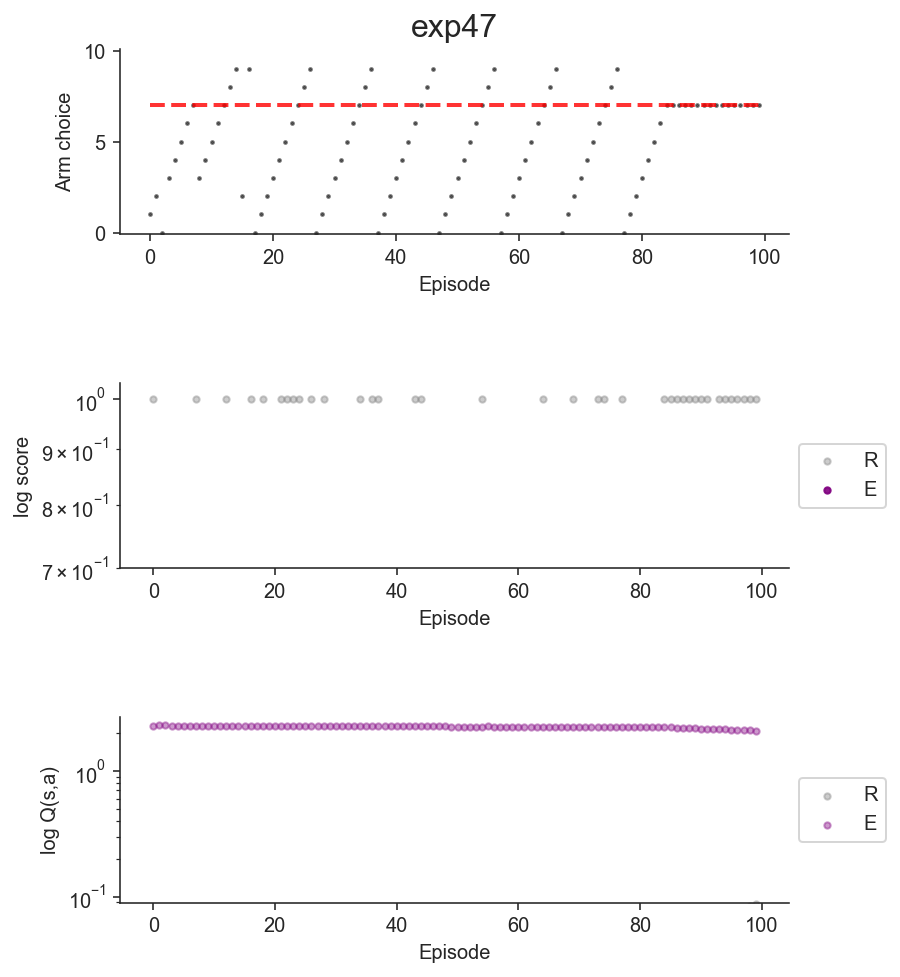

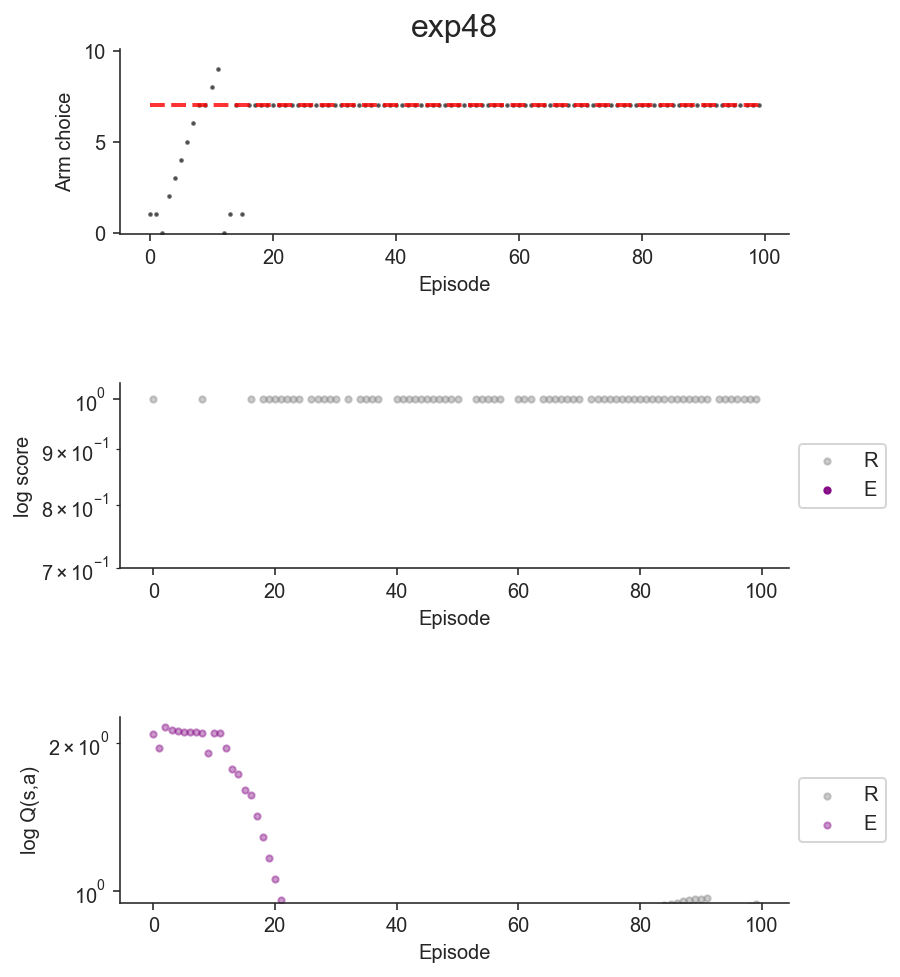

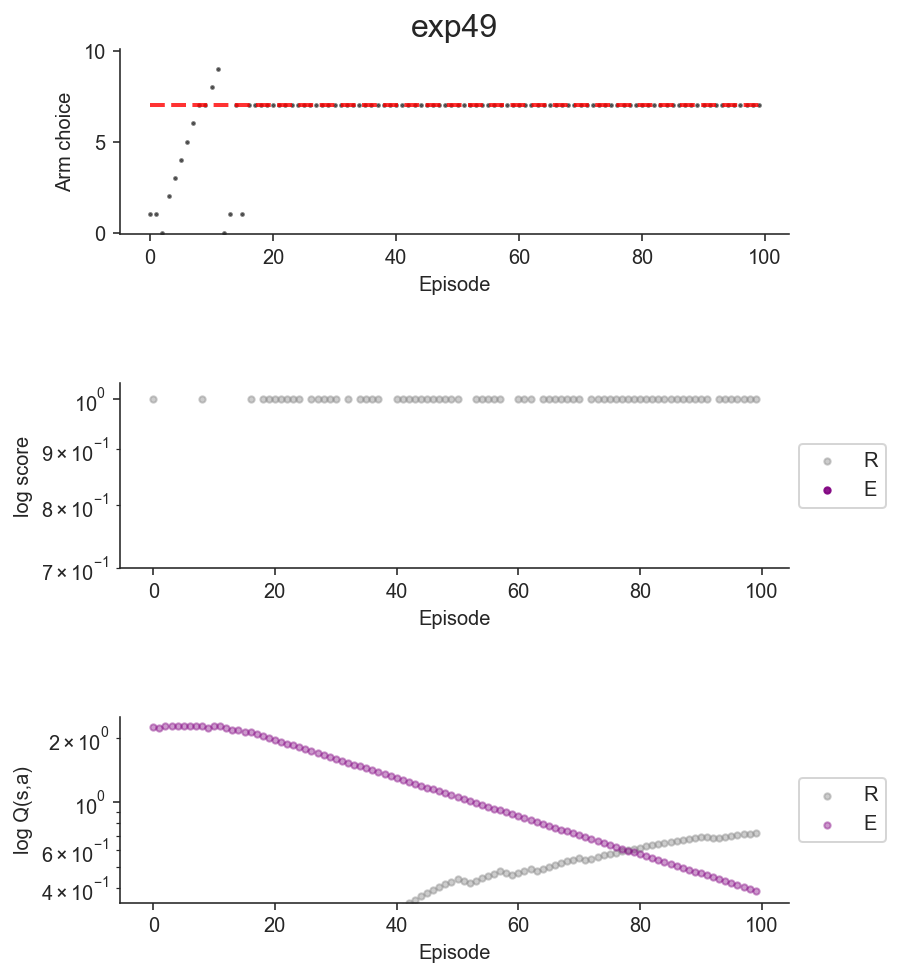

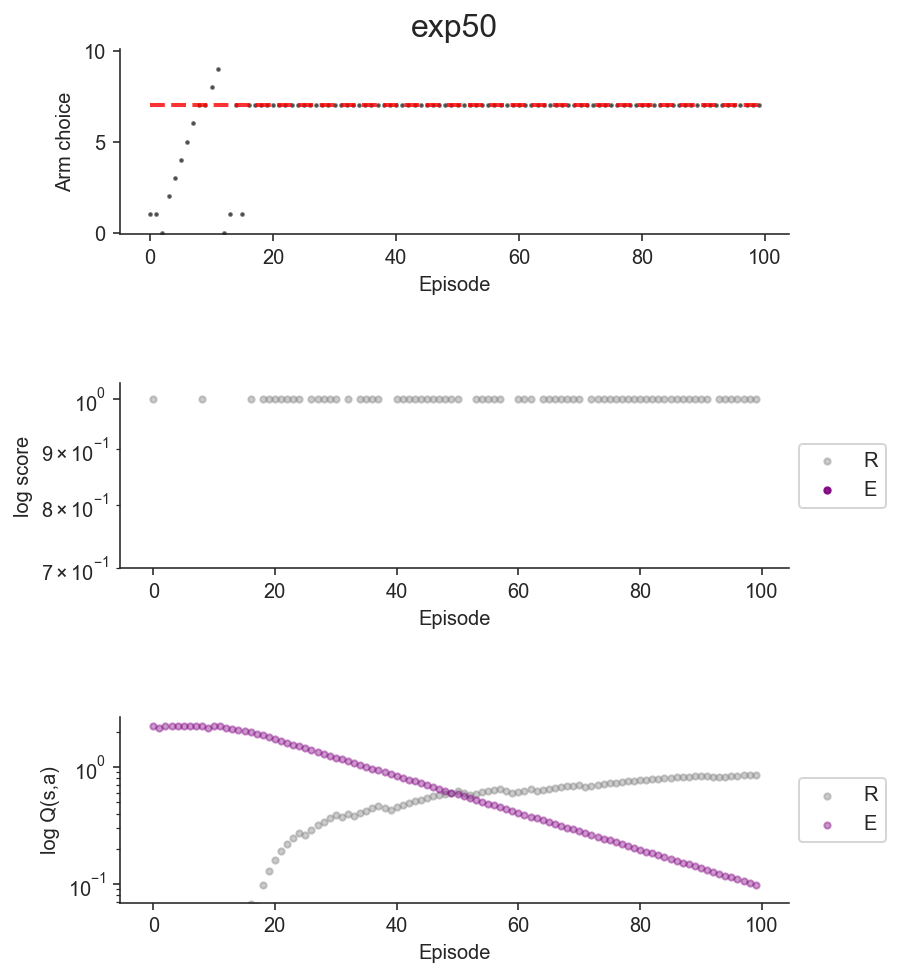

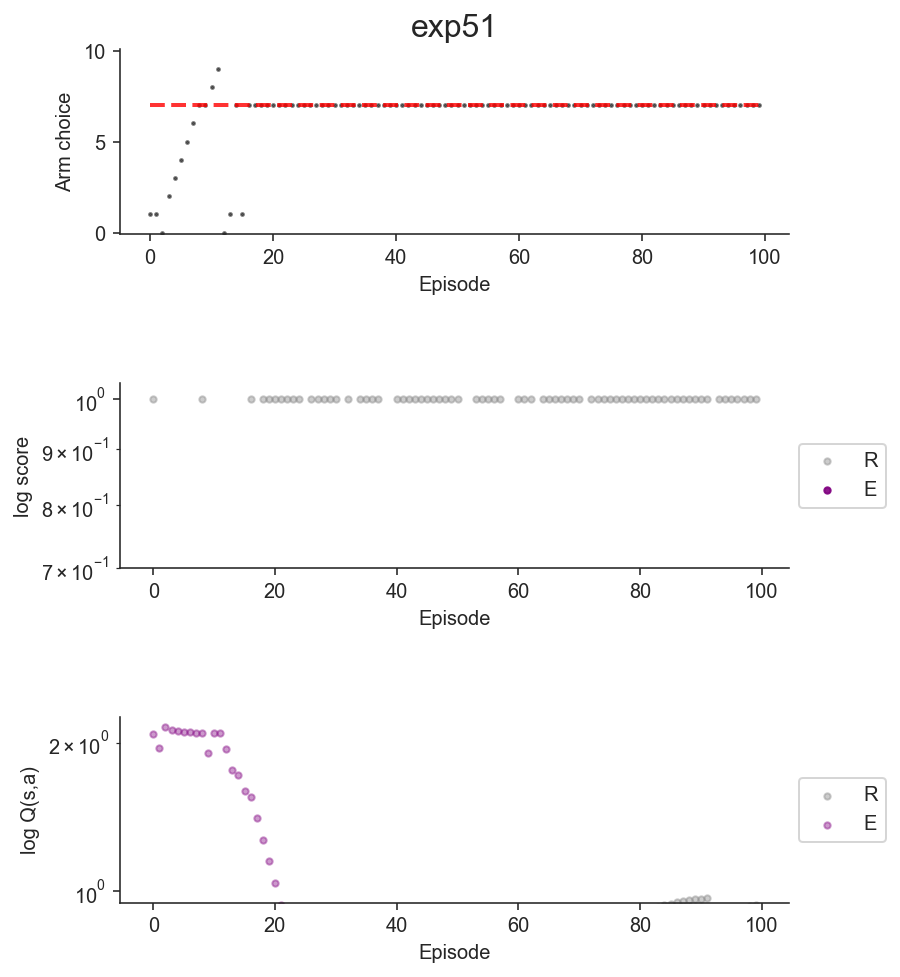

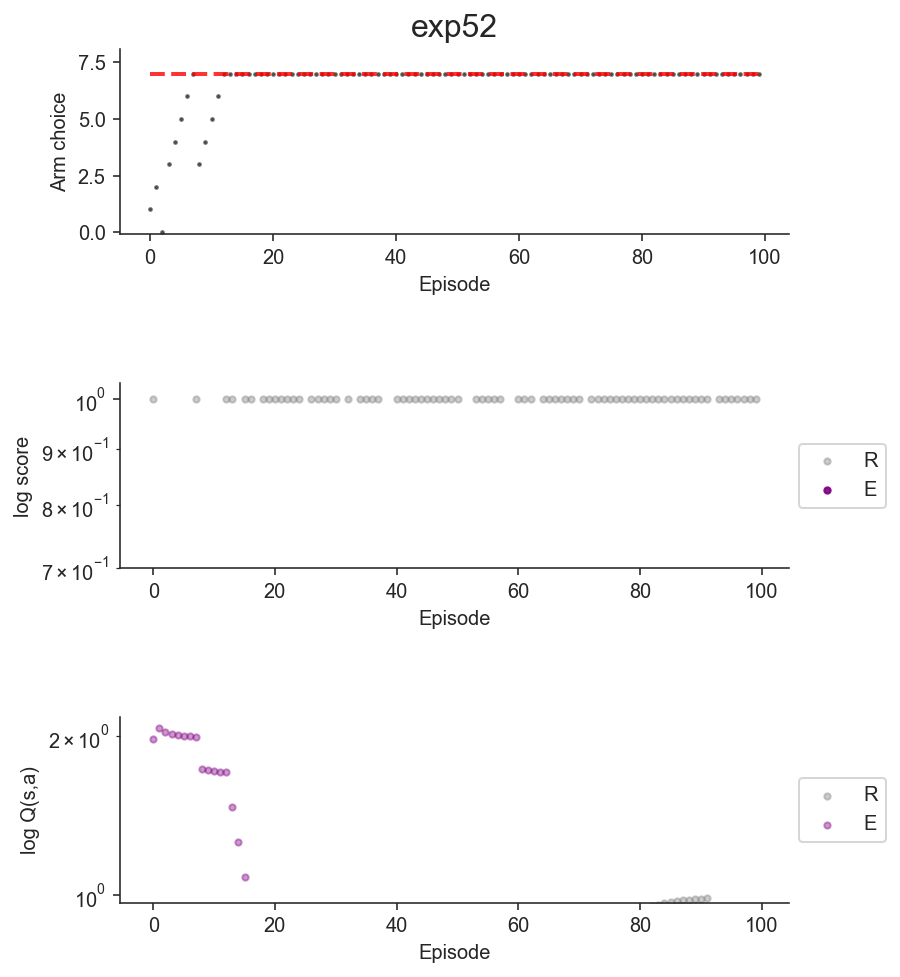

In [19]:
# Plot run
for exp_name, result in zip(exp_names, results):
    episodes = result["episodes"]
    actions =result["actions"]
    scores_R = result["scores_R"]
    values_R = result["values_R"]
    scores_E = result["scores_E"]
    values_E = result["values_E"]

    # Get some data from the gym...
    env = gym.make(env_name)
    best = env.best
    print(f"Best arm: {best}, last arm: {actions[-1]}")

    # Init plot
    fig = plt.figure(figsize=(6, 14))
    grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

    # Do plots:
    # Arm
    plt.subplot(grid[0, 0])
    plt.title(exp_name)
    plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
    plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
             color="red", alpha=0.8, ls='--', linewidth=2)
    plt.ylim(-.1, np.max(actions)+1.1)
    plt.ylabel("Arm choice")
    plt.xlabel("Episode")

    # score
    plt.subplot(grid[1, 0])
    plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=10, label="R")
    plt.scatter(episodes, scores_E, color="purple", alpha=0.9, s=10, label="E")
    plt.ylabel("log score")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # Q
    plt.subplot(grid[2, 0])
    plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=10, label="R")
    plt.scatter(episodes, values_E, color="purple", alpha=0.4, s=10, label="E")
    plt.ylabel("log Q(s,a)")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # -
    plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
    plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

# Sensitivity

to parameter choices between all the different opt runs

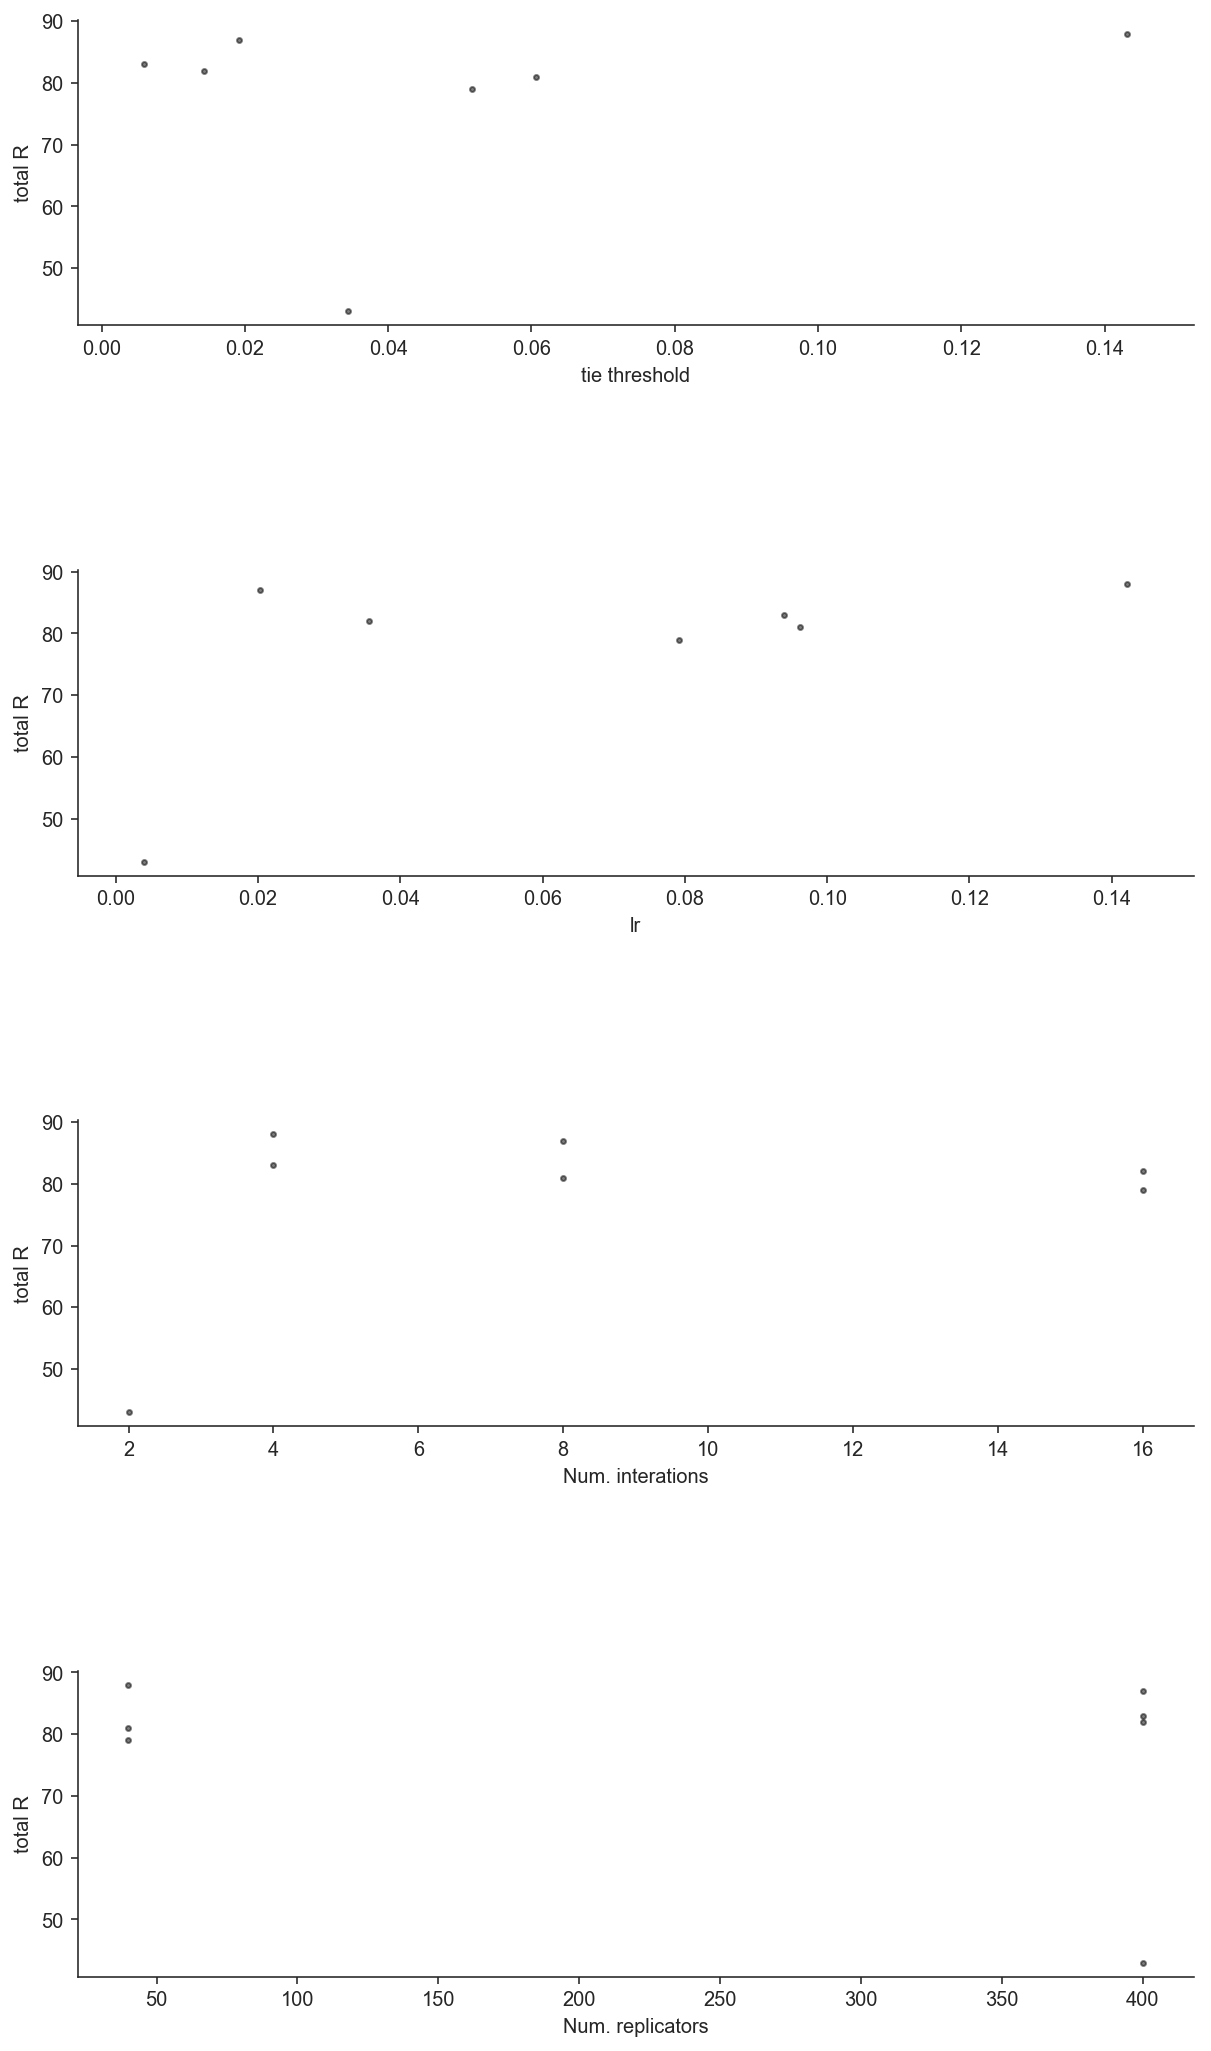

In [24]:
    # Init plot
fig = plt.figure(figsize=(10, 18))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(ties, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("tie threshold")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.scatter(lrs, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.ylabel("total R")
plt.xlabel("lr")
_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(num_iterations, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Num. interations")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[3, 0])
plt.scatter(num_replicators, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Num. replicators")
plt.ylabel("total R")
_ = sns.despine()

# Distributions

of parameters

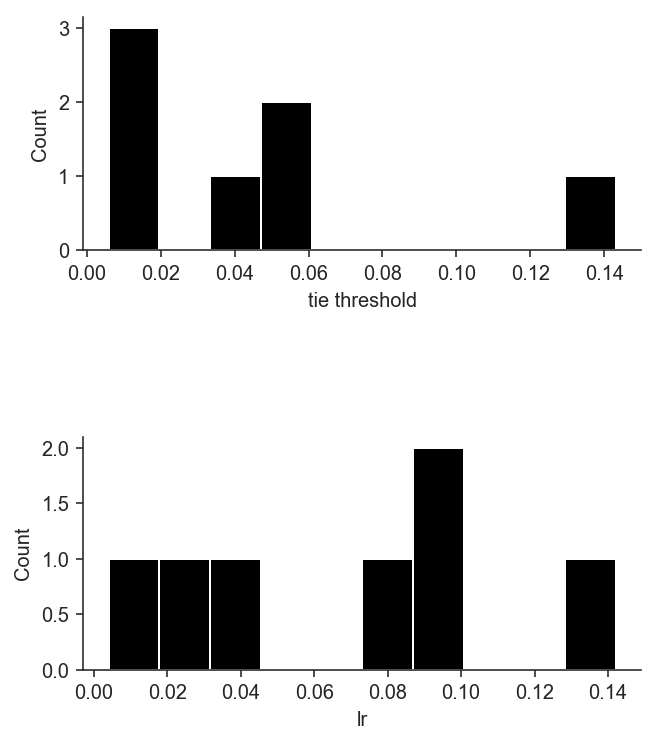

In [30]:
# Init plot
fig = plt.figure(figsize=(5, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(ties, color="black")
plt.xlabel("tie threshold")
plt.ylabel("Count")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.hist(lrs, color="black")
plt.xlabel("lr")
plt.ylabel("Count")
_ = sns.despine()

In [35]:
sorted(lrs)

[0.0039834751368258295,
 0.020275991906962502,
 0.03560542194092265,
 0.07915672290595326,
 0.09388342781723866,
 0.09612752908293383,
 0.1421784912409777]

In [36]:
sorted(ties)

[0.005942132325156814,
 0.014241769966555226,
 0.019177048327543612,
 0.03445070293423822,
 0.05170622381361763,
 0.060695323146614424,
 0.1431450391147704]

of total reward

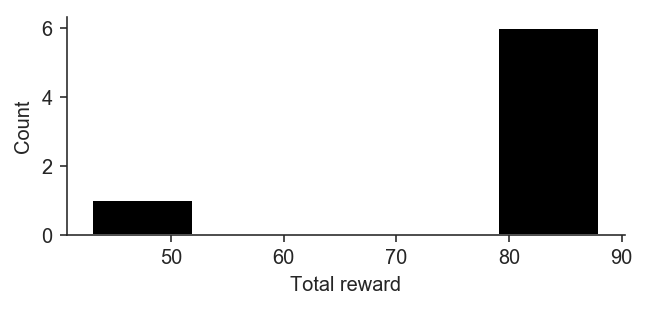

In [29]:
# Init plot
fig = plt.figure(figsize=(5, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(total_Rs, color="black", bins=5)
plt.xlabel("Total reward")
plt.ylabel("Count")
_ = sns.despine()

In [37]:
sorted(total_Rs)

[43.0, 79.0, 81.0, 82.0, 83.0, 87.0, 88.0]